In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import random

%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger, ReduceLROnPlateau

import tensorflow as tf
import random as rn

import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [2]:
input_width = 28
input_height = 28
n_hid = 1000

lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('./input/leapgestrecog/leapGestRecog/00/'):
    if not j.startswith('.'): # If running this code locally, this is to 
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup


x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('./input/leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('./input/leapgestrecog/leapGestRecog/0' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open('./input/leapgestrecog/leapGestRecog/0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((input_width, input_height))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
x_data = x_data / 255 * 2 - 1
print(x_data.shape)
#x_data = x_data.reshape(datacount, -1)

y_data = np.array(y_data)
y_data = y_data.reshape(datacount)


(20000, 28, 28)


In [3]:
# input
inp = tf.keras.Input(shape=(input_height, input_width, 1))

# convolutional layers
conv0 = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=3,
    activation=tf.nn.relu,
)(inp)

conv1 = tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=3,
    strides=2,
    activation=tf.nn.relu,
)(conv0)

# fully connected layer
flatten = tf.keras.layers.Flatten()(conv1)
dense = tf.keras.layers.Dense(units=10, activation="softmax")(flatten)

model = tf.keras.Model(inputs=inp, outputs=dense)

In [4]:
y_data=to_categorical(y_data)
x_data = x_data.reshape((datacount, input_height, input_width, 1))

print(x_data.shape)
print(y_data.shape)
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2, random_state=42)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5, random_state=42)

(20000, 28, 28, 1)
(20000, 10)


In [5]:
batch_size=128
epochs=5

In [6]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 10)                92170     
                                                                 
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
_________________________________________________________________


c:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
#train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
#history = model.fit(train_generator, epochs=epochs, batch_size=batch_size, validation_data=(x_validate, y_validate))
History = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_validate, y_validate))
#History = history
model.save('my_model_small.h5')

Epoch 1/5
125/125 [==============================] - 4s 25ms/step - loss: 0.8928 - accuracy: 0.7206 - val_loss: 0.2277 - val_accuracy: 0.9350
Epoch 2/5
125/125 [==============================] - 3s 23ms/step - loss: 0.1138 - accuracy: 0.9768 - val_loss: 0.0420 - val_accuracy: 0.9920
Epoch 3/5
125/125 [==============================] - 3s 23ms/step - loss: 0.0325 - accuracy: 0.9946 - val_loss: 0.0154 - val_accuracy: 0.9980
Epoch 4/5
125/125 [==============================] - 3s 23ms/step - loss: 0.0142 - accuracy: 0.9983 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 5/5
125/125 [==============================] - 3s 25ms/step - loss: 0.0078 - accuracy: 0.9991 - val_loss: 0.0127 - val_accuracy: 0.9975


63/63 [==============================] - 0s 3ms/step


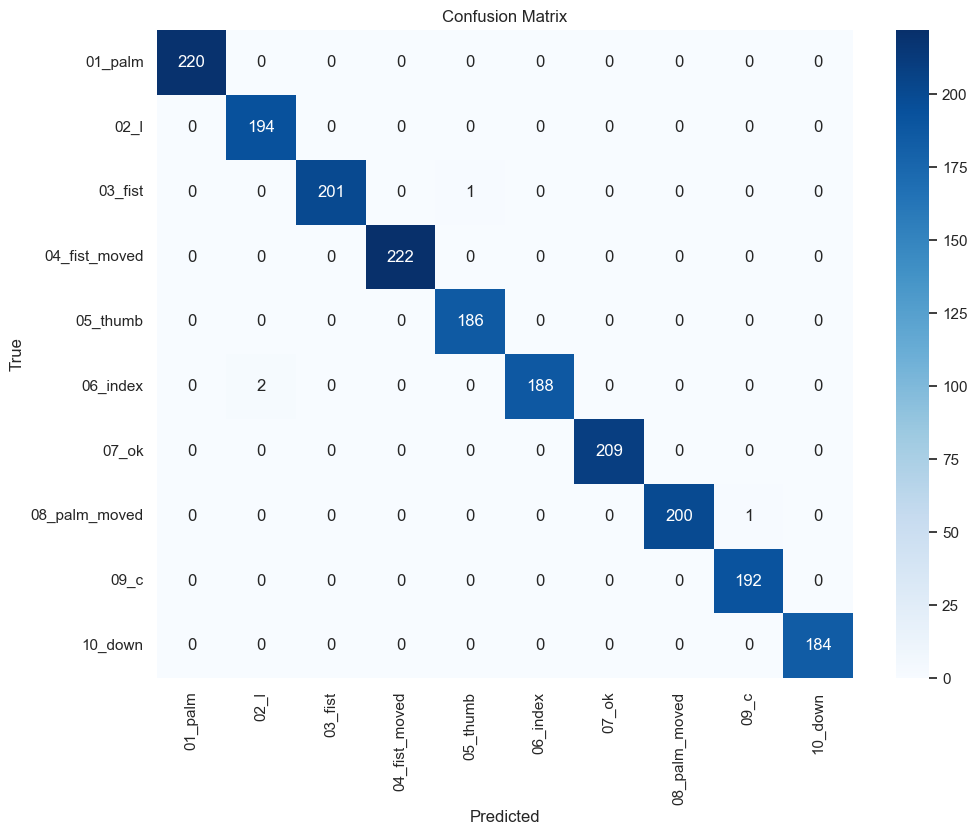

In [8]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_mat = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=reverselookup.values(),
            yticklabels=reverselookup.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [9]:
from sklearn.metrics import precision_score, recall_score

def f2_score(y_true, y_pred):
    # Assuming y_true and y_pred are binary (0 or 1) arrays

    # Calculate precision and recall
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')

    # Set beta for F2 score
    beta = 2

    # Calculate F2 score
    f2 = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

    return f2

In [10]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

In [11]:
print(f2_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

0.9979491846086388


In [13]:
my_pred = x_data[1].reshape(1,input_height, input_width,1)

In [16]:
y_pred = model.predict(my_pred)

1/1 [==============================] - 0s 16ms/step
